<a href="https://colab.research.google.com/github/Aaina26/Deep-Learning-Unschool/blob/main/Project_4_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
#Create data
series=np.sin((0.1*np.arange(5000))**2)


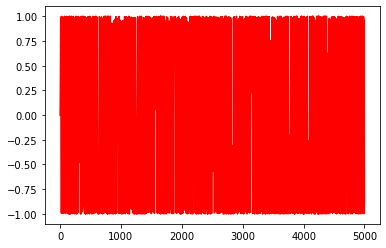

In [21]:
#plot data
plt.plot(series,'red')
plt.show()

In [22]:
T=10 #timestep
D=1 #no. of features or dimensions
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(X)
print("X.shape",X.shape,"Y.shape",Y.shape)


X.shape (4990, 10) Y.shape (4990,)


In [23]:
X=X.reshape(-1,T,1)
i=Input(shape=(T,D))
x=LSTM(10)(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.05),
)
r=model.fit(
    X[:-N//2], Y[:-N//2],
    #batch_size=32,
    epochs=100,
    validation_data=(X[-N//2:],Y[-N//2:]),
)


Epoch 1/100
78/78 [==============================] - 4s 14ms/step - loss: 0.5114 - val_loss: 0.4901
Epoch 2/100
78/78 [==============================] - 1s 7ms/step - loss: 0.5091 - val_loss: 0.4897
Epoch 3/100
78/78 [==============================] - 1s 9ms/step - loss: 0.5068 - val_loss: 0.4877
Epoch 4/100
78/78 [==============================] - 1s 7ms/step - loss: 0.5011 - val_loss: 0.4805
Epoch 5/100
78/78 [==============================] - 1s 8ms/step - loss: 0.4859 - val_loss: 0.4643
Epoch 6/100
78/78 [==============================] - 1s 9ms/step - loss: 0.4477 - val_loss: 0.4096
Epoch 7/100
78/78 [==============================] - 1s 7ms/step - loss: 0.3633 - val_loss: 0.3198
Epoch 8/100
78/78 [==============================] - 1s 8ms/step - loss: 0.2648 - val_loss: 0.2164
Epoch 9/100
78/78 [==============================] - 1s 7ms/step - loss: 0.1804 - val_loss: 0.1435
Epoch 10/100
78/78 [==============================] - 1s 6ms/step - loss: 0.1201 - val_loss: 0.0979
Epoch 11

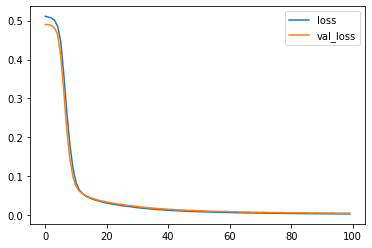

In [24]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

156/156 [==============================] - 1s 2ms/step
(4990, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

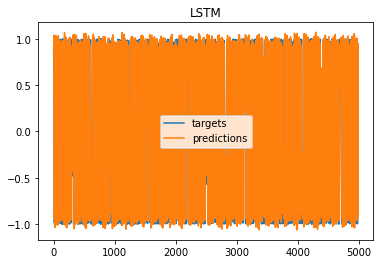

In [26]:
#one step forecast using true targets
outputs=model.predict(X)
print(outputs.shape)
predictions=outputs[:,0]
plt.plot(Y, label='targets')
plt.plot(predictions,label='predictions')
plt.title('LSTM')
plt.legend()
plt.show

1/1 [==============================] - 0s 44ms/step


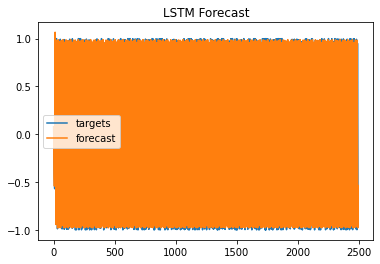

In [27]:
#mult-step forecast
#instead of predicting a single value, predicting multiple values
forecast=[]
input_=X[-N//2]
while len(forecast)<len(Y[-N//2:]):
  f=model.predict(input_.reshape(1,T,1))[0,0]
  forecast.append(f)
  input_=np.roll(input_,-1)
  input_[-1]=f

plt.plot(Y[-N//2:],label='targets')
plt.plot(forecast,label='forecast')
plt.title("LSTM Forecast")
plt.legend()
plt.show()